In [1]:
import pandas as pd #reading and writing spreadsheets
import numpy as np #effective for computations
import matplotlib.pyplot as plt #for visualization
from sklearn.cluster import KMeans #used for the implementation of the algorithm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline 

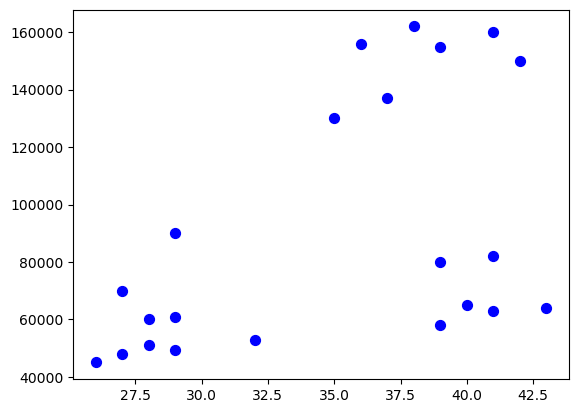

In [2]:
df = pd.read_csv("CSV/income.csv")
df.head()
plt.scatter(df['Age'], df['Income($)'],s=50,c='b')

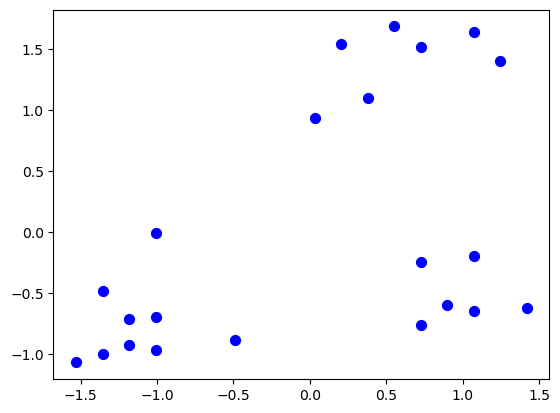

In [3]:
#Scaled the Axes
df[['Age','Income($)']] = StandardScaler().fit_transform(df[['Age','Income($)']])
plt.scatter(df['Age'], df['Income($)'],s=50,c='b')

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,-1.356055,-0.480684
1,Michael,-1.009157,-0.010159
2,Mohan,-1.009157,-0.692421
3,Ismail,-1.182606,-0.715947
4,Kory,1.245679,1.401417


In [5]:
X = df.drop(['Name'],axis=1)
Kmean = KMeans(n_clusters=3) #using two clusters for now
Kmean.fit(X) #running the algorithm on on the dataset

C:\Users\Bindu\anaconda3\envs\AI_ENV\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [6]:
Kmean.cluster_centers_ #helps us find our centroids

array([[ 0.60143983,  1.40141653],
       [-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261]])

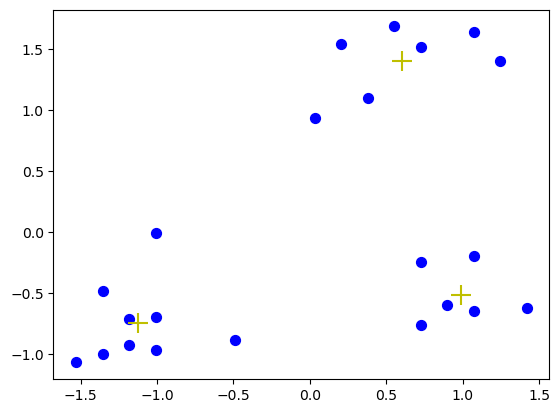

In [7]:
plt.scatter(df['Age'], df['Income($)'],s=50,c='b')
plt.scatter(Kmean.cluster_centers_[:,0],  Kmean.cluster_centers_[:,1], s=200, c='y', marker='+')
plt.show()

In [8]:
Kmean.labels_

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [9]:
X['Clusters'] = Kmean.labels_
X['Clusters'] = X["Clusters"].astype("category")
X.head()

,Age,Income($),Clusters
0,-1.356055,-0.480684,1
1,-1.009157,-0.010159,1
2,-1.009157,-0.692421,1
3,-1.182606,-0.715947,1
4,1.245679,1.401417,0


In [10]:
X

,Age,Income($),Clusters
0,-1.356055,-0.480684,1
1,-1.009157,-0.010159,1
2,-1.009157,-0.692421,1
3,-1.182606,-0.715947,1
4,1.245679,1.401417,0
5,0.725332,1.519048,0
6,1.072230,1.636679,0
7,0.551883,1.683732,0
8,0.204985,1.542574,0
9,0.031536,0.930891,0


In [11]:
distortions = []
K = range(1,10)
for k in K:
    kmeanTest = KMeans(n_clusters=k)
    kmeanTest.fit(X)
    distortions.append(kmeanTest.inertia_) #SSE


C:\Users\Bindu\anaconda3\envs\AI_ENV\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bindu\anaconda3\envs\AI_ENV\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bindu\anaconda3\envs\AI_ENV\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bindu\anaconda3\envs\AI_ENV\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

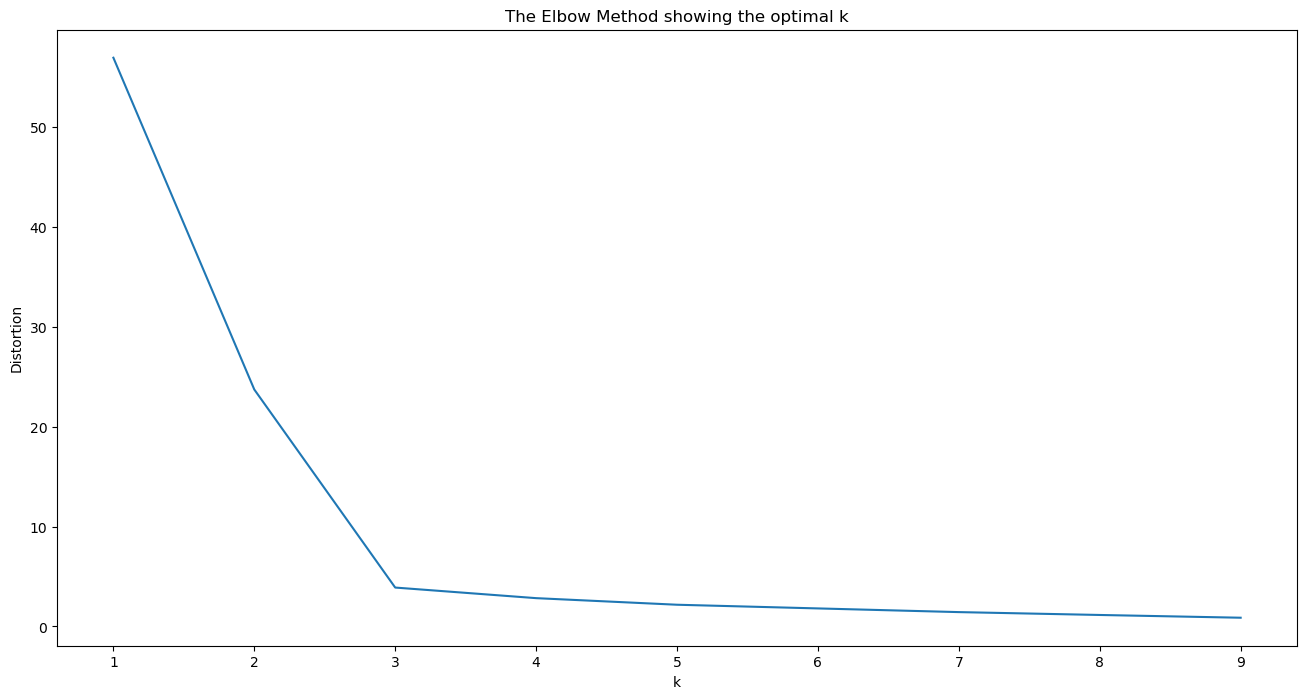

In [12]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()